[View in Colaboratory](https://colab.research.google.com/github/dxftctcdtc/CodingPractice/blob/master/google_guide_basic_classification.ipynb)

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

1.10.0


## prepare the data

In [2]:
# import and load the data
fashion_m = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_m.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels)

(60000, 28, 28)
(60000,)
[9 0 0 ... 3 0 5]


In [5]:
print(test_images.shape)
print(test_labels.shape)
print(test_labels)

(10000, 28, 28)
(10000,)
[9 2 1 ... 8 1 5]


## preprocess the data

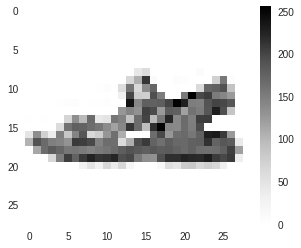

In [6]:
plt.figure()
plt.imshow(train_images[1111])
plt.colorbar()
plt.gca().grid(False)

In [0]:
# scale the data to range [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

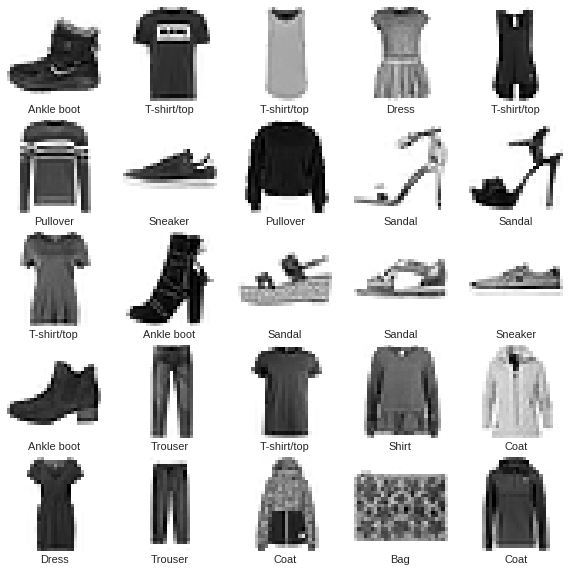

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

## build the model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## train and evaluate the model

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.4973 - acc: 0.8264
Epoch 2/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.3754 - acc: 0.8633
Epoch 3/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.3363 - acc: 0.8780
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.3130 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.2964 - acc: 0.8895


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy:', test_acc)

10000/10000 [==============================] - 0s 34us/step
test accuracy: 0.8751


## make predictions

In [0]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([7.5617731e-07, 2.1691726e-10, 1.4362325e-07, 1.0867860e-08,
       5.6490763e-09, 1.4868680e-03, 2.8706907e-06, 4.5984699e-03,
       1.7283503e-06, 9.9390912e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

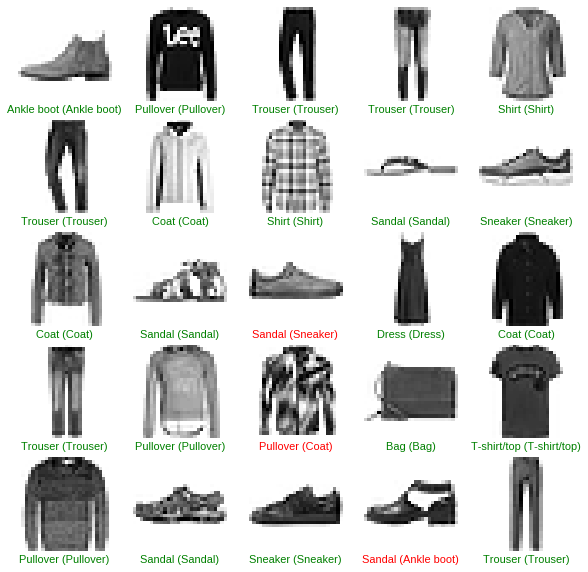

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(class_names[predicted_label],
                             class_names[true_label]),
             color = color)
      